In [1]:
from PIL import Image

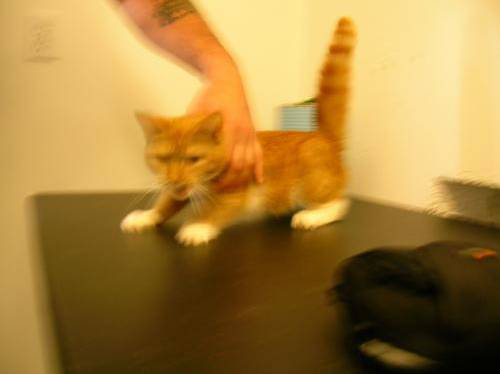

In [2]:
cat0 = Image.open("DogsVsCats/train/cat.0.jpg")
cat0

In [3]:
import numpy as np

In [4]:
np.array(cat0)

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

In [5]:
import os

In [6]:
train_folder = "DogsVsCats/train/"
test_folder = "DogsVsCats/test1/"

os.listdir(train_folder)[:10]

['cat.5220.jpg',
 'dog.79.jpg',
 'dog.9681.jpg',
 'dog.338.jpg',
 'cat.4350.jpg',
 'cat.6487.jpg',
 'cat.3859.jpg',
 'cat.1858.jpg',
 'dog.5718.jpg',
 'cat.7717.jpg']

In [7]:
images = []
target = []
for image in os.listdir(train_folder)[:2000]:
    if image.startswith("dog"):
        target.append([0,1])
    else:
        target.append([1,0])
    
    im = Image.open(train_folder+image).resize((224,224)).convert("RGB")
    im = np.array(im)
    
    images.append(im)
    
images = np.array(images)
target = np.array(target).reshape((2000,2))

images.shape, target.shape

((2000, 224, 224, 3), (2000, 2))

In [8]:
images = images / 255.
images = images.astype(np.float32)

In [9]:
images[0]

array([[[0.08235294, 0.2627451 , 0.35686275],
        [0.12156863, 0.30588236, 0.42352942],
        [0.14117648, 0.3372549 , 0.48235294],
        ...,
        [0.1882353 , 0.40784314, 0.6       ],
        [0.20784314, 0.42745098, 0.61960787],
        [0.18039216, 0.41960785, 0.6039216 ]],

       [[0.11764706, 0.3019608 , 0.40392157],
        [0.15294118, 0.34509805, 0.47058824],
        [0.16470589, 0.36862746, 0.52156866],
        ...,
        [0.20392157, 0.42352942, 0.6156863 ],
        [0.14117648, 0.36078432, 0.5529412 ],
        [0.13725491, 0.3764706 , 0.56078434]],

       [[0.13725491, 0.32156864, 0.43137255],
        [0.17254902, 0.3647059 , 0.49019608],
        [0.1764706 , 0.38039216, 0.53333336],
        ...,
        [0.22352941, 0.44313726, 0.63529414],
        [0.15294118, 0.37254903, 0.5647059 ],
        [0.21568628, 0.45490196, 0.6392157 ]],

       ...,

       [[0.21176471, 0.43529412, 0.6039216 ],
        [0.20784314, 0.43137255, 0.6       ],
        [0.1764706 , 0

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

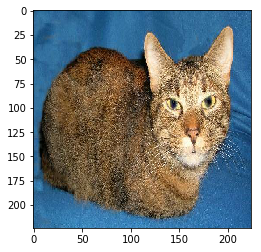

In [11]:
plt.imshow(images[0])

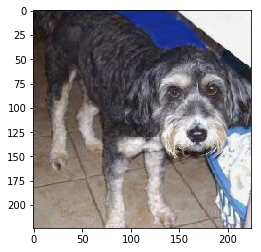

In [12]:
plt.imshow(images[1])

In [13]:
images.shape

(2000, 224, 224, 3)

In [14]:
# images = images.reshape((2000, 80*80*3))
images.shape

(2000, 224, 224, 3)

In [15]:
target.shape

(2000, 2)

In [16]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D, MaxPool2D, Dropout

Using TensorFlow backend.


In [19]:
model = Sequential()

model.add(Conv2D(100, (3,3), input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(200, (3,3)))
model.add(MaxPool2D())
model.add(Conv2D(300, (3,3)))
model.add(Conv2D(300, (3,3)))
model.add(MaxPool2D())
model.add(Conv2D(200, (3,3)))
model.add(MaxPool2D())
model.add(Conv2D(100, (3,3)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

model.compile("Adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 100)     2800      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 100)     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 200)     180200    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 200)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 300)       540300    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 300)       810300    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 300)       0         
__________

In [20]:
h = model.fit(images, target, epochs=20, validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 17s 11ms/step - loss: 1.2561 - acc: 0.5144 - val_loss: 0.6873 - val_acc: 0.5200
Epoch 2/20
1600/1600 [==============================] - 14s 9ms/step - loss: 0.6928 - acc: 0.5369 - val_loss: 0.6906 - val_acc: 0.5150
Epoch 3/20
1600/1600 [==============================] - 14s 9ms/step - loss: 0.6899 - acc: 0.5631 - val_loss: 0.6813 - val_acc: 0.5550
Epoch 4/20
1600/1600 [==============================] - 14s 9ms/step - loss: 0.6825 - acc: 0.5719 - val_loss: 0.7207 - val_acc: 0.5025
Epoch 5/20
1600/1600 [==============================] - 14s 9ms/step - loss: 0.6838 - acc: 0.5706 - val_loss: 0.6860 - val_acc: 0.5450
Epoch 6/20


KeyboardInterrupt: 

In [ ]:
plt.plot(h.history["acc"])
plt.plot(h.history["val_acc"])

In [21]:
from keras.applications import MobileNet

In [22]:
model = MobileNet(input_shape=(224,224,3))

# for layer in model.layers[:-10]:
#     layer.trainable = False

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [24]:
master_model = Sequential()

master_model.add(model)
master_model.add(Dense(20))
master_model.add(Dense(2, activation="softmax"))

master_model.compile("Adam", loss="categorical_crossentropy", metrics=["accuracy"])

master_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1000)              4253864   
_________________________________________________________________
dense_3 (Dense)              (None, 20)                20020     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 42        
Total params: 4,273,926
Trainable params: 4,252,038
Non-trainable params: 21,888
_________________________________________________________________


In [25]:
h = master_model.fit(images, target, epochs=5, validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/5
1600/1600 [==============================] - 11s 7ms/step - loss: 0.5684 - acc: 0.8838 - val_loss: 0.4859 - val_acc: 0.9000
Epoch 2/5
1600/1600 [==============================] - 10s 6ms/step - loss: 0.4503 - acc: 0.8600 - val_loss: 0.7522 - val_acc: 0.5950
Epoch 3/5
1600/1600 [==============================] - 10s 6ms/step - loss: 0.3754 - acc: 0.8725 - val_loss: 0.4111 - val_acc: 0.8375
Epoch 4/5
1600/1600 [==============================] - 10s 6ms/step - loss: 0.3744 - acc: 0.8438 - val_loss: 0.5389 - val_acc: 0.7925
Epoch 5/5
1600/1600 [==============================] - 10s 6ms/step - loss: 0.2923 - acc: 0.8888 - val_loss: 0.6981 - val_acc: 0.7125
